<a href="https://colab.research.google.com/github/SANDRAJACOB1/Machine-Learning-Projects/blob/main/MLR_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [ ]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

Text(0.5, 1.0, 'Extracurricular activities Count Graph')

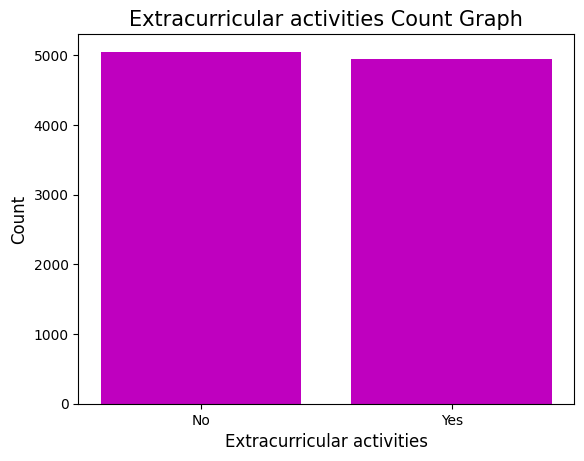

In [ ]:
act=['No','Yes']
count=[5052,4948]
plt.bar(act,count,color='m')
plt.xlabel('Extracurricular activities',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Extracurricular activities Count Graph',fontsize=15)

In [ ]:
x=df.iloc[:,:-1]
x

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [ ]:
y=df.iloc[:,-1]
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

Text(0.5, 1.0, 'Hours Studied v/s Performance Index Graph')

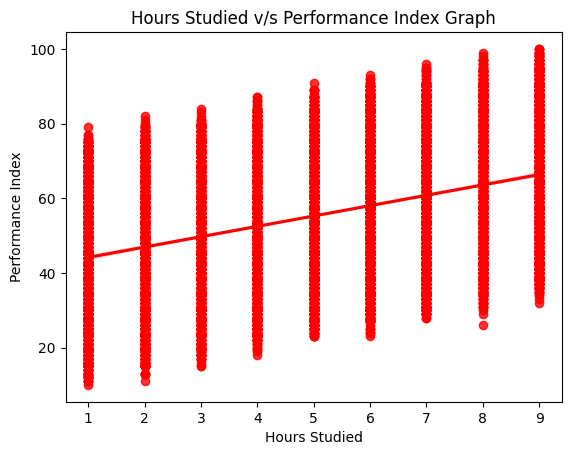

In [ ]:
sns.regplot(x=df['Hours Studied'],y=y,color='r')
plt.title('Hours Studied v/s Performance Index Graph',fontsize=12)

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

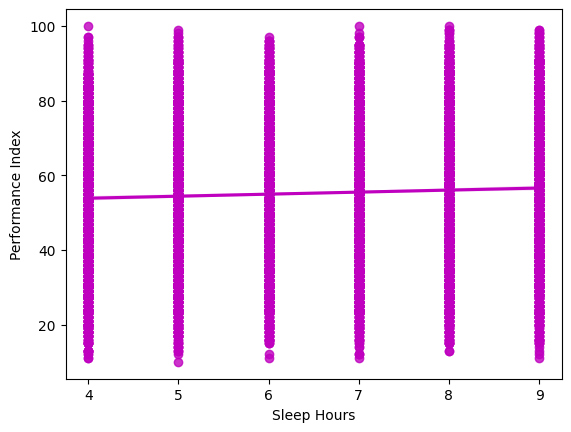

In [ ]:
sns.regplot(x=df['Sleep Hours'],y=y,color='m')
plt.title('Sleep Hours v/s Performance Index Graph',fontsize=12)

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

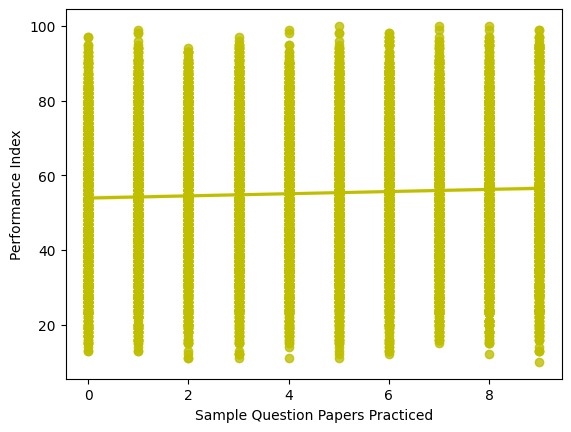

In [ ]:
sns.regplot(x=df['Sample Question Papers Practiced'],y=y,color='y')
plt.title('Sample Question Papers Practiced v/s Performance Index Graph',fontsize=12)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
one=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Extracurricular Activities']),remainder='passthrough')
x=one.fit_transform(x)

In [ ]:
x.shape

(10000, 6)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[ 0.,  1.,  4., 99.,  6.,  1.],
       [ 0.,  1.,  6., 90.,  9.,  3.],
       [ 1.,  0.,  8., 57.,  6.,  1.],
       ...,
       [ 1.,  0.,  9., 48.,  7.,  6.],
       [ 1.,  0.,  1., 47.,  9.,  0.],
       [ 1.,  0.,  2., 46.,  6.,  6.]])

In [ ]:
x_test

array([[ 1.,  0.,  5., 69.,  8.,  2.],
       [ 0.,  1.,  2., 46.,  4.,  8.],
       [ 0.,  1.,  7., 56.,  7.,  5.],
       ...,
       [ 0.,  1.,  5., 48.,  6.,  4.],
       [ 0.,  1.,  3., 86.,  9.,  5.],
       [ 0.,  1.,  6., 43.,  6.,  4.]])

In [ ]:
y_train

9069    82.0
2603    79.0
7738    50.0
1579    81.0
5058    52.0
        ... 
5734    48.0
5191    51.0
5390    44.0
860     20.0
7270    24.0
Name: Performance Index, Length: 7000, dtype: float64

In [ ]:
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
8014    32.0
1074    40.0
3063    33.0
6487    69.0
4705    29.0
Name: Performance Index, Length: 3000, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

In [ ]:
df1=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Error':y_test-y_pred})
df1

,Actual value,Predicted value,Error
6252,51.0,54.747286,-3.747286
4684,20.0,22.618844,-2.618844
1731,46.0,47.936651,-1.936651
4742,28.0,31.340099,-3.340099
4521,41.0,43.059743,-2.059743
...,...,...,...
8014,32.0,31.819775,0.180225
1074,40.0,37.503045,2.496955
3063,33.0,33.424518,-0.424518
6487,69.0,67.925790,1.074210


In [ ]:
print("The slope of the lines is",model.coef_)
print("The constant is",model.intercept_)

The slope of the line is [-0.29085643  0.29085643  2.85895223  1.01551979  0.47967676  0.19039416]
The constant is -33.54568738005484


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print("The Mean Absolute Percentage Error is",mean_absolute_percentage_error(y_test,y_pred))
print("The R2 score is",r2_score(y_test,y_pred))

The Mean Absolute Percentage Error is 0.03504200252156818
The R2 score is 0.9890110607021136
